In [43]:
import os

import matplotlib.pyplot as plt
import numpy as np

import pyabf
import tifffile

In [44]:
denoised_movie = np.load('/home/jupyter/bw-data/cellmincer/data/cell_3_1_MMStack_Pos0/denoised_movie_tyx.npy').transpose((0, 2, 1))

In [45]:
denoised_movie.shape

(5000, 512, 100)

In [47]:
save_fig = False
fig_suffix = 'miller'

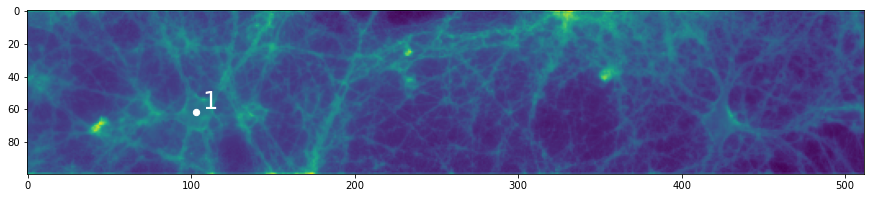

In [51]:
pixs = [(103, 62)]

frame = denoised_movie[1200].copy()
plt.figure(figsize=(15, 12))
plt.imshow(frame.T)
for i, pix in enumerate(pixs):
    plt.text(pix[0] + 4, pix[1] - 2, f'{i + 1}', color='white', fontsize=24)
plt.scatter(*list(zip(*pixs)), color='white', s=40)
if save_fig:
    plt.savefig(f'neuron_pix{fig_suffix}.png')
plt.show()

In [62]:
raw = tifffile.imread('/home/jupyter/bw-data/miller-ephys/standard_imaging/id_170802_cell_3/cell_3_1_MMStack_Pos0.ome.tif').transpose((0, 2, 1))
abf = pyabf.ABF('/home/jupyter/bw-data/miller-ephys/standard_imaging/id_170802_cell_3/17802002.abf')
abf.setSweep(0)

(5000, 512, 100)

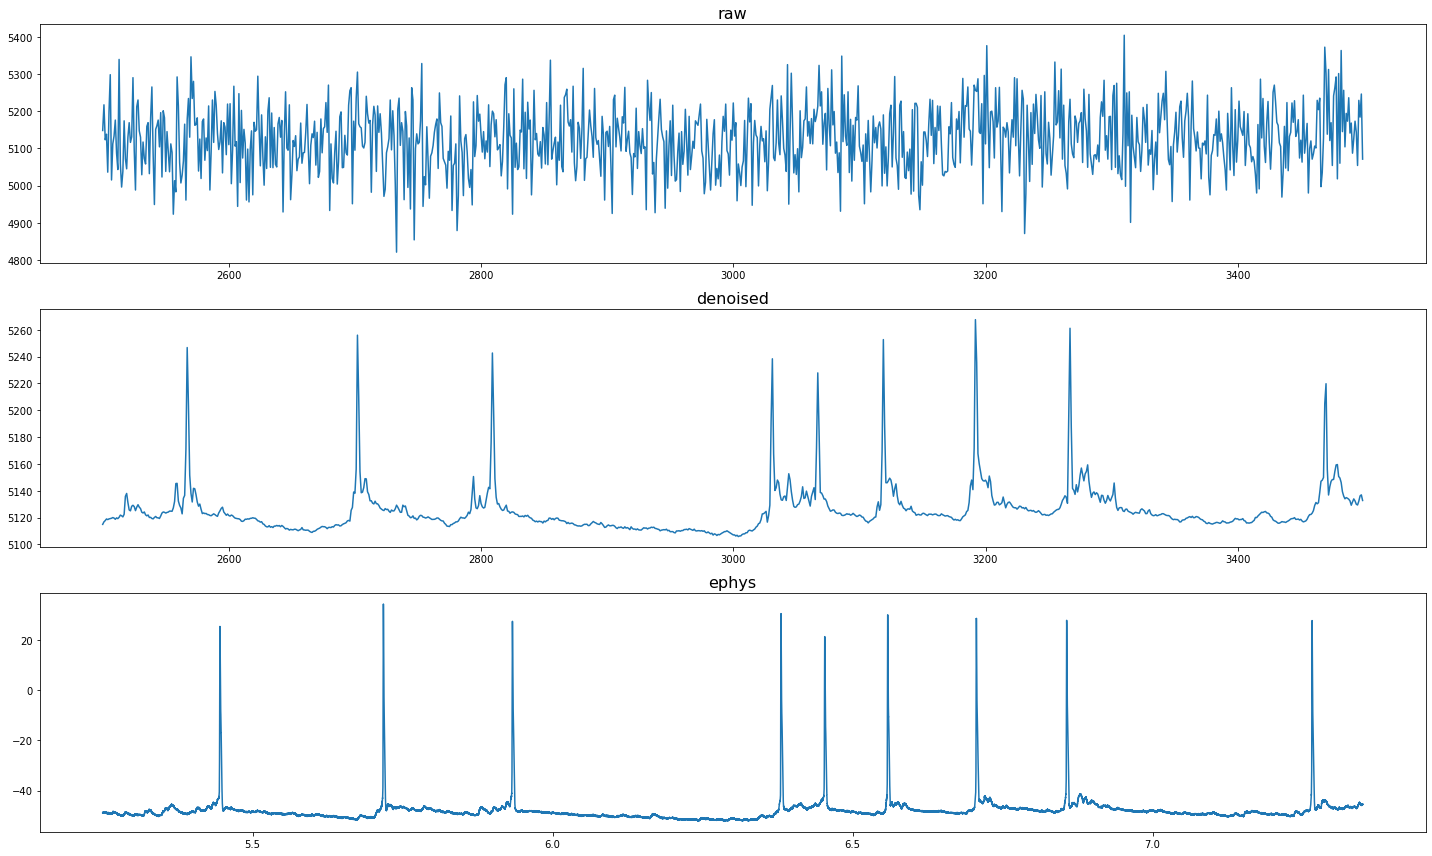

In [75]:
begin, end = 0.5, 0.7
i_frame_begin, i_frame_end = int(len(raw) * begin), int(len(raw) * end)
i_ephys_begin, i_ephys_end = int(len(abf.sweepX) * begin), int(len(abf.sweepX) * end)

pix = pixs[0]

np.argmax(np.correlate(denoised_movie[:, pix[0], pix[1]]), abf.)

fig, axs = plt.subplots(3, figsize=(20, 12))

axs[0].plot(np.arange(i_frame_begin, i_frame_end), raw[i_frame_begin+offset:i_frame_end+offset, pix[0], pix[1]])
axs[1].plot(np.arange(i_frame_begin, i_frame_end), denoised_movie[i_frame_begin+offset:i_frame_end+offset, pix[0], pix[1]])
axs[2].plot(abf.sweepX[i_ephys_begin:i_ephys_end], abf.sweepY[i_ephys_begin:i_ephys_end])

axs[0].set_title('raw', size=16)
axs[1].set_title('denoised', size=16)
axs[2].set_title('ephys', size=16)

fig.tight_layout()

if save_fig:
    fig.savefig(f'pix_overlay_{fig_suffix}.png')
fig.show()

In [67]:
abf.sweepX[-10:]

array([10.4998, 10.4998, 10.4998, ..., 10.4999, 10.5   , 10.5   ])